# NHL Season Data to Predict Rankings
### Jacob Mayer, Kyle Lindsey, Kyle Davison

### Part 1. Statement of the Problem

**In our project, we are looking to see if we can use the sklearn nearest neighbor algorithm to accurately predict where an NHL team would place at the end of the season, using different types of parameters from Hockeyreference.com. It is interesting because we will be able to find out which statistics in hockey will correlate to a better season, which could be good to know if you were to bet on teams or something along those lines.**

### Part 2:

**The data that we used all comes from Hockeyreference.com. We created an excel spreadsheet of all the end of season data for the NHL from 2006-2007 to 2016-2017. In our program, we used pandas to parse through the dataframes to get the different stats we were looking for. The data is below.**

In [323]:
import pandas as pd


#file_17_18 = pd.read_excel('NHL_stats.xlsx',sheet_name =0, skiprows= 1)
file_16_17 = pd.read_excel('NHL_stats.xlsx',sheet_name =1, skiprows= 1)
file_15_16 = pd.read_excel('NHL_stats.xlsx',sheet_name =2, skiprows= 1)
file_14_15 = pd.read_excel('NHL_stats.xlsx',sheet_name =3, skiprows= 1)
file_13_14 = pd.read_excel('NHL_stats.xlsx',sheet_name =4, skiprows= 1)
file_12_13 = pd.read_excel('NHL_stats.xlsx',sheet_name =5, skiprows= 1)
file_11_12 = pd.read_excel('NHL_stats.xlsx',sheet_name =6, skiprows= 1)
file_10_11 = pd.read_excel('NHL_stats.xlsx',sheet_name =7, skiprows= 1)
file_09_10 = pd.read_excel('NHL_stats.xlsx',sheet_name =8, skiprows= 1)
file_08_09 = pd.read_excel('NHL_stats.xlsx',sheet_name =9, skiprows= 1)
file_07_08 = pd.read_excel('NHL_stats.xlsx',sheet_name =10, skiprows= 1)
file_06_07 = pd.read_excel('NHL_stats.xlsx',sheet_name =11, skiprows= 1)
#usecols= [0,1,2,7,8,9,10,13,14,15,16,17]
stats_lst = [file_06_07,file_07_08,file_08_09,file_09_10,file_10_11,file_11_12,file_12_13,file_13_14,file_14_15,file_15_16,file_16_17]
file_06_07

,Rk,2006-2007,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
0,1.0,Buffalo Sabres*,27.2,82,53,22,7,113,0.689,298,...,81.35,8,13,14.6,15.2,2417,12.3,2541,0.906,2
1,2.0,Detroit Red Wings*,32.3,82,50,19,13,113,0.689,252,...,84.56,12,11,12.0,12.4,2771,9.1,2020,0.905,8
2,3.0,Anaheim Ducks*,28.5,82,48,20,14,110,0.671,254,...,85.12,4,4,17.8,17.8,2582,9.8,2248,0.912,5
3,4.0,Nashville Predators*,27.4,82,51,23,8,110,0.671,266,...,85.90,8,2,14.4,15.7,2261,11.8,2561,0.919,11
4,5.0,New Jersey Devils*,29.4,82,49,24,9,107,0.652,206,...,85.24,4,11,10.1,12.3,2354,8.8,2332,0.917,12
5,6.0,San Jose Sharks*,26.4,82,51,26,5,107,0.652,256,...,83.33,7,4,11.6,14.2,2346,10.9,2148,0.908,11
6,7.0,Dallas Stars*,30.0,82,50,25,7,107,0.652,217,...,84.35,3,6,13.8,14.9,2295,9.5,2114,0.908,9
7,8.0,Pittsburgh Penguins*,26.0,82,47,24,11,105,0.640,267,...,82.10,14,13,15.2,16.9,2366,11.3,2529,0.905,6
8,9.0,Ottawa Senators*,26.6,82,48,25,9,105,0.640,286,...,84.52,17,12,14.2,14.6,2651,10.8,2479,0.913,6
9,10.0,Vancouver Canucks*,28.0,82,49,26,7,105,0.640,217,...,86.93,5,8,14.7,14.2,2405,9.0,2398,0.918,5


In [324]:
for dataframe in stats_lst:
    # Stripping the sterisk out of the names
    for iterator , string in enumerate(dataframe.iloc[:,1]):
        dataframe.iloc[iterator,1] = string.strip('*')
    #print(dataframe.iloc[:,1])
        

### Part 3:

**Since we are looking at rankings, which is a form of classification, we used the sklearn nearest neighbor model. It learns from the training data what each feature vector should be labeled as, then when we put in the testing vectors, it looks to see which classification the vector is closest to. A strength of this model is that it is only as good as the parameters we pick to use. There are some statistics that correlate better to a winning team than others, and for statistics that do not correlate well, this model will fail to be effective. On the other hand, If the statistics chosen do correlate to a winning team, then this model will be effective due to certain team rankings having similar stats. It is also important that we tested four parameters at a time. We just went through the columns and tested for four in a row.**

In [325]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set up class labels and feature vectors
class_labels = []
feature_vectors = []
for dataframe in stats_lst:
    for iteration, rank in enumerate(dataframe.iloc[:-1,0]):
        class_labels.append(rank)
        feature_vectors.append([i for i in dataframe.iloc[iteration, 2:6]])
        
#class_labels
#feature_vector




In [326]:
# Set up the training and test vectors
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors, class_labels, test_size = .20, train_size = .8)
#test_labels

In [327]:
from sklearn.neighbors import KNeighborsClassifier

#Using nearest neighbor to guess placing
neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results = neigh.predict(test_vectors)
#for i in range(len(results)):
#    print(test_labels[i], "    ", results[i])

In [328]:
neigh.score(test_vectors,test_labels)

0.10606060606060606

### Part 4:

**To test our model, we put the results into a function that calculates a score based off of what the nearest neighbor model predicted. Since rankings vary a lot from season to season (no statistic is garunteed to give you a certain ranking without relation to other teams), the score function that tests it gives the result an error of +-1. That means if a team ended in 16th place but was predicted to be in 17th place, it would still count as a success to us.**

In [329]:
def score_with_error(true_vect, guess_vect):
    # Adds +- 1 to the predicted score for a more realistic prediction
    count = 0
    for i in range(len(true_vect)):
        if (guess_vect[i] >= true_vect[i] - 1) and  (guess_vect[i] <= true_vect[i] + 1):
            count += 1
    return count /len(true_vect)

In [330]:
feat_vect = []
score = []
placement_scores = {
    'Top5':[],
    'Middle5':[],
    'Bottom5':[],
    'Stats':[]
}
for j in range(len(file_07_08)):
    if 6 +j > 30:
        break
    #print(file_07_08.columns[j],j)
    top5=[]
    middle5 = []
    bottom5 = []
    statnames = []
    class_labels = []
    feature_vectors = []
    for dataframe in stats_lst:
        for iteration, average in enumerate(dataframe.iloc[:-1,0]):
            class_labels.append(average)
            feature_vectors.append([i for i in dataframe.iloc[iteration, 2+j:6+j]])
    for name in range(2+j,6+j):
        statnames.append(dataframe.columns[name])
    train_vectors, test_vectors, train_labels, test_labels = train_test_split(
        feature_vectors, class_labels, test_size = .30, train_size = .7)
    neigh = KNeighborsClassifier(n_neighbors=8)
    neigh.fit(train_vectors,train_labels)
    results = neigh.predict(test_vectors)
    
    for val in range(len(test_labels)): # collecting placement data
        if test_labels[val] <=5:
            top5.append([test_labels[val], results[val]])
        elif (12 < test_labels[val] < 18):
            middle5.append([test_labels[val], results[val]])
        elif (test_labels[val] >= 25):
            bottom5.append([test_labels[val], results[val]])
            
    placement_scores['Top5'].append(top5)
    placement_scores['Middle5'].append(middle5)
    placement_scores['Bottom5'].append(bottom5)
    placement_scores['Stats'].append(statnames)
    
    score.append(score_with_error(test_labels,results))
    feat_vect.append(feature_vectors)
#print(feat_vect[0]) #0-30 different vector arrays
print(np.round(score,5))
#placement_scores['Stats']

[0.56566 0.45455 0.57576 0.49495 0.27273 0.32323 0.23232 0.22222 0.23232
 0.17172 0.18182 0.12121 0.19192 0.20202 0.17172 0.17172 0.07071 0.08081
 0.08081 0.06061 0.06061 0.08081 0.11111 0.10101 0.12121]


### Part 5:

**After testing the data, we found that some stats had a greater impact than others. For instance, things like wins, losses, and points were always going to matter more than something like short handed goals, and the model demonstrates that. In our test, we found that outside of things like wins, losses, win percentage, etc, the most promising data for predicting placement was the simple rating system (SRS), and goals for and against (GF, GA)**

In [331]:
for i in range(len(score)):
    print("{} got a score of {:.5f}".format(placement_scores['Stats'][i],score[i]))

['AvAge', 'GP', 'W', 'L'] got a score of 0.56566
['GP', 'W', 'L', 'OL'] got a score of 0.45455
['W', 'L', 'OL', 'PTS'] got a score of 0.57576
['L', 'OL', 'PTS', 'PTS%'] got a score of 0.49495
['OL', 'PTS', 'PTS%', 'GF'] got a score of 0.27273
['PTS', 'PTS%', 'GF', 'GA'] got a score of 0.32323
['PTS%', 'GF', 'GA', 'SOW'] got a score of 0.23232
['GF', 'GA', 'SOW', 'SOL'] got a score of 0.22222
['GA', 'SOW', 'SOL', 'SRS'] got a score of 0.23232
['SOW', 'SOL', 'SRS', 'SOS'] got a score of 0.17172
['SOL', 'SRS', 'SOS', 'TG/G'] got a score of 0.18182
['SRS', 'SOS', 'TG/G', 'EVGF'] got a score of 0.12121
['SOS', 'TG/G', 'EVGF', 'EVGA'] got a score of 0.19192
['TG/G', 'EVGF', 'EVGA', 'PP'] got a score of 0.20202
['EVGF', 'EVGA', 'PP', 'PPO'] got a score of 0.17172
['EVGA', 'PP', 'PPO', 'PP%'] got a score of 0.17172
['PP', 'PPO', 'PP%', 'PPA'] got a score of 0.07071
['PPO', 'PP%', 'PPA', 'PPOA'] got a score of 0.08081
['PP%', 'PPA', 'PPOA', 'PK%'] got a score of 0.08081
['PPA', 'PPOA', 'PK%', '

In [332]:
# Gathering data for SRS, GA, and GF
top5_specific = []
middle5_specific = []
bottom5_specific = []
class_labels_specific = []
feature_vectors_specific = []
for dataframe in stats_lst:
    for iteration, rank in enumerate(dataframe.iloc[:-1,0]):
        class_labels_specific.append(rank)
        feature_vectors_specific.append([i for i in dataframe.iloc[iteration, [9,10,13]]])
        
#feature_vectors_specific

train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    feature_vectors_specific, class_labels_specific, test_size = .30, train_size = .7)

neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(train_vectors,train_labels)
results_specific = neigh.predict(test_vectors)


for val in range(len(test_labels)): # collecting placement data
        if test_labels[val] <=5:
            top5_specific.append([test_labels[val], results_specific[val]])
        elif (12 < test_labels[val] < 18):
            middle5_specific.append([test_labels[val], results_specific[val]])
        elif (test_labels[val] >= 25):
            bottom5_specific.append([test_labels[val], results_specific[val]])
            
    
    
specific_score = score_with_error(test_labels,results_specific)



print("Using SRS, EVGF, EVGA, we get a score of {:.5f}".format(specific_score))
#top5_specific


Using SRS, EVGF, EVGA, we get a score of 0.24242


# Plotting Results for (Wins, Losses, OT Wins, and Points) and (Goals for, Goals against, and Simple Rating System)

### Part 6

**For our problem we confirmed that Wins, Losses, and Points correlated strongest to predicting end of the season placements. That was not suprising. We also learned that goals for, goals against, and simple rating also correlated fairly well to rankings, but not as strongly. Based off of our tests, it seems that our model is better at predicting teams accurately who ended in the top 5 or bottom five. We think this is because teams in those positions tend to get around the same statistics every season, whereas teams in the middle tend to share very similar statistics. In conclusion, we believe that the model maybe was not the best choice. There are probably better algorithms to use than the nearest neighbor algorithm for this specific problem. However, When it came to testing heavily correlated statistics like wins and points, it got the rankings right over half of the time, which is pretty good considering there are 30 different classifiers to choose from. So it was good at the easier stuff, but for more accurate classification, we believe using something like a artificial neural network would be more effective.**

Text(0.5, 1.0, 'Top 5 Results for best parameters')

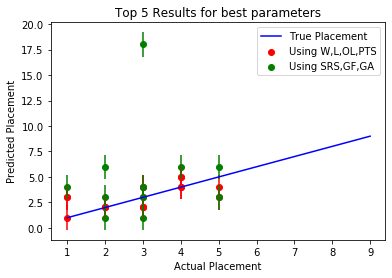

In [341]:
import matplotlib.pyplot as plt
%matplotlib inline
label = True
for i in range(len(placement_scores['Top5'])):
    for j in placement_scores['Top5'][i]:
        if i == 2: # To plot w,l,ot, ant pts
            if label:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1, label = "Using W,L,OL,PTS")
                plt.errorbar(j[0],j[1],1.2, color = "red")
                label = False
            else:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1)
                plt.errorbar(j[0],j[1],1.2, color = "red")
label = True
for i in range(len(top5_specific)):   
    if label:
        plt.scatter(top5_specific[i][0],top5_specific[i][1],color = 'green', label = "Using SRS,GF,GA")
        plt.errorbar(top5_specific[i][0],top5_specific[i][1],1.2,color = 'green')
        label = False
    else:
        plt.scatter(top5_specific[i][0],top5_specific[i][1],color = 'green')
        plt.errorbar(top5_specific[i][0],top5_specific[i][1],1.2,color = 'green')
    
plt.plot([i for i in range(1,10)],[i for i in range(1,10)], color = 'blue', label = "True Placement")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.ylabel("Predicted Placement")
plt.xlabel("Actual Placement")
plt.legend()

plt.title("Top 5 Results for best parameters")

Text(0.5, 1.0, 'Middle 5 Results for best parameters')

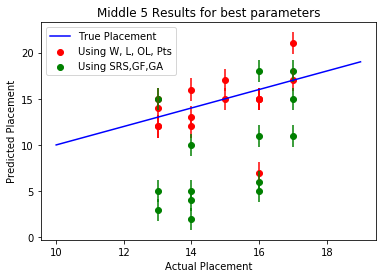

In [342]:
label = True
for i in range(len(placement_scores['Middle5'])):
    for j in placement_scores['Middle5'][i]:
        if i == 2:
            if label:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1, label = "Using W, L, OL, Pts")
                plt.errorbar(j[0],j[1],1.2, color = "red")
                label = False
            else:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1)
                plt.errorbar(j[0],j[1],1.2, color = "red")
label = True
for i in range(len(middle5_specific)):   
    if label:
        plt.scatter(middle5_specific[i][0],middle5_specific[i][1],color = 'green', label = "Using SRS,GF,GA")
        plt.errorbar(middle5_specific[i][0],middle5_specific[i][1],1.2,color = 'green')
        label = False
    else:
        plt.scatter(middle5_specific[i][0],middle5_specific[i][1],color = 'green')
        plt.errorbar(middle5_specific[i][0],middle5_specific[i][1],1.2,color = 'green')
    
plt.plot([i for i in range(10,20)],[i for i in range(10,20)], color = 'blue', label = "True Placement")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.ylabel("Predicted Placement")
plt.xlabel("Actual Placement")
plt.legend()

plt.title("Middle 5 Results for best parameters")

Text(0.5, 1.0, 'Bottom 5 Results for best parameters')

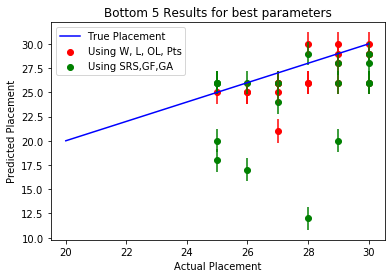

In [343]:
label = True
for i in range(len(placement_scores['Bottom5'])):
    for j in placement_scores['Bottom5'][i]:
        if i == 2:
            if label:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1, label = "Using W, L, OL, Pts")
                plt.errorbar(j[0],j[1],1.2, color = "red")
                label = False
            else:
                plt.scatter(j[0],j[1], color = 'red', alpha = 1)
                plt.errorbar(j[0],j[1],1.2, color = "red")
label = True
for i in range(len(bottom5_specific)):   
    if label:
        plt.scatter(bottom5_specific[i][0],bottom5_specific[i][1],color = 'green', label = "Using SRS,GF,GA")
        plt.errorbar(bottom5_specific[i][0],bottom5_specific[i][1],1.2,color = 'green')
        label = False
    else:
        plt.scatter(bottom5_specific[i][0],bottom5_specific[i][1],color = 'green')
        plt.errorbar(bottom5_specific[i][0],bottom5_specific[i][1],1.2,color = 'green')
    
plt.plot([i for i in range(20,31)],[i for i in range(20,31)], color = 'blue', label = "True Placement")
       # plt.scatter(j[1],j[1], color = 'blue')
plt.ylabel("Predicted Placement")
plt.xlabel("Actual Placement")
plt.legend()

plt.title("Bottom 5 Results for best parameters")